Library
--------------------------

In [5358]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Files
--------------------------

In [5359]:
data = pd.read_csv('Credit_Card_Train.csv')
data2 = pd.read_csv('Credit_Card_X_Test.csv')

Understanding Data
--------------------------

In [5360]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5361]:
data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [5362]:
data.shape

(483, 16)

Data Minipulation
--------------------------

In [5363]:
me = statistics.mean(data['Debt'])

for (i,row) in data.iterrows():
  data.at[i,'Debt'] = data.at[i,'Debt'] - me

  # me = statistics.mean(data2['Debt'])

for (i,row) in data2.iterrows():
  data2.at[i,'Debt'] = data2.at[i,'Debt'] - me

In [5364]:
me = statistics.mean(data['Income'])

for (i,row) in data.iterrows():
  data.at[i,'Income'] = data.at[i,'Income'] - me

# me = statistics.mean(data2['Income'])

for (i,row) in data2.iterrows():
  data2.at[i,'Income'] = data2.at[i,'Income'] - me

In [5365]:
me = statistics.mean(data['Age'])

for (i,row) in data.iterrows():
  data.at[i,'Age'] = data.at[i,'Age'] - me

# me = statistics.mean(data2['Age'])

for (i,row) in data2.iterrows():
  data2.at[i,'Age'] = data2.at[i,'Age'] - me

In [5366]:
me = statistics.mean(data['CreditScore'])

for (i,row) in data.iterrows():
  data.at[i,'CreditScore'] = data.at[i,'CreditScore'] - me

# me = statistics.mean(data2['CreditScore'])

for (i,row) in data2.iterrows():
  data2.at[i,'CreditScore'] = data2.at[i,'CreditScore'] - me

In [5367]:
# data = data.assign( CreditScore2 = data.CreditScore, Debt2 = data.Debt, Income2 = data.Income, Age2 = data.Age)
# data2 = data2.assign( CreditScore2 = data2.CreditScore, Debt2 = data2.Debt, Income2 = data2.Income, Age2 = data2.Age)

In [5368]:
data['ByBirth'] = data.Citizen == 'ByBirth'
data2['ByBirth'] = data2.Citizen == 'ByBirth'

data['ByOtherMeans'] = data.Citizen == 'ByOtherMeans'
data2['ByOtherMeans'] = data2.Citizen == 'ByOtherMeans'

data['Temporary'] = data.Citizen == 'Temporary'
data2['Temporary'] = data2.Citizen == 'Temporary'

In [5369]:
data['Energy'] = data.Industry == 'Energy'
data2['Energy'] = data2.Industry == 'Energy'

data['Industrials'] = data.Industry == 'Industrials'
data2['Industrials'] = data2.Industry == 'Industrials'

data['ConsumerStaples'] = data.Industry == 'ConsumerStaples'
data2['ConsumerStaples'] = data2.Industry == 'ConsumerStaples'

data['Materials'] = data.Industry == 'Materials'
data2['Materials'] = data2.Industry == 'Materials'

data['Healthcare'] = data.Industry == 'Healthcare'
data2['Healthcare'] = data2.Industry == 'Healthcare'

data['ConsumerDiscretionary'] = data.Industry == 'ConsumerDiscretionary'
data2['ConsumerDiscretionary'] = data2.Industry == 'ConsumerDiscretionary'

In [5370]:
data['White'] = data.Ethnicity == 'White'
data2['White'] = data2.Ethnicity == 'White'

data['Black'] = data.Ethnicity == 'Black'
data2['Black'] = data2.Ethnicity == 'Black'

data['Asian'] = data.Ethnicity == 'Asian'
data2['Asian'] = data2.Ethnicity == 'Asian'

data['Latino'] = data.Ethnicity == 'Latino'
data2['Latino'] = data2.Ethnicity == 'Latino'

data['Other'] = data.Ethnicity == 'Other'
data2['Other'] = data2.Ethnicity == 'Other'

In [5371]:
# arr = ['ConsumerStaples' ,'ConsumerDiscretionary' , 'Industrials']
# for (i,row) in data.iterrows():
#   if (row.ZipCode in arr):
#     data['other'] = True
#   else:
#     data['other'] = False


# # arr = ['ConsumerStaples' ,'ConsumerDiscretionary' , 'Industrials']
# for (i,row) in data2.iterrows():
#   if (row.ZipCode in arr):
#     data2['other'] = True
#   else:
#     data2['other'] = False

In [5372]:
workField = set(data['Industry'])
workField = list(workField)

for (i,row) in data.iterrows():
  data.at[i,'Industry'] = workField.index(row.Industry)

for (i,row) in data2.iterrows():
  if (row.Industry not in workField):
    workField.append(row.Industry)
  data2.at[i,'Industry'] = workField.index(row.Industry)

In [5373]:
data2.drop("id", axis=1, inplace=True)

In [5374]:
Zcode = set(data['ZipCode'])
Zcode = list(Zcode)

for (i,row) in data.iterrows():
  data.at[i,'ZipCode'] = Zcode.index(row.ZipCode) 

for (i,row) in data2.iterrows():
  if (row.ZipCode not in Zcode):
    Zcode.append(row.ZipCode)
  data2.at[i,'ZipCode'] = Zcode.index(row.ZipCode) 

In [5375]:
# data.drop("ZipCode", axis=1, inplace=True)
# data2.drop("ZipCode", axis=1, inplace=True)

In [5376]:
# data.drop("Industry", axis=1, inplace=True)
# data2.drop("Industry", axis=1, inplace=True)

In [5377]:
data.drop("Ethnicity", axis=1, inplace=True)
data2.drop("Ethnicity", axis=1, inplace=True)

In [5378]:
data.drop("Citizen", axis=1, inplace=True)
data2.drop("Citizen", axis=1, inplace=True)

TEST
--------------------------

In [5379]:
# data.drop("YearsEmployed", axis=1, inplace=True)
# data2.drop("YearsEmployed", axis=1, inplace=True)

In [5380]:
# data.drop("Energy", axis=1, inplace=True)
# data2.drop("Energy", axis=1, inplace=True)

# data.drop("Materials", axis=1, inplace=True)
# data2.drop("Materials", axis=1, inplace=True)

# data.drop("Healthcare", axis=1, inplace=True)
# data2.drop("Healthcare", axis=1, inplace=True)

In [5381]:
# data.drop("Gender", axis=1, inplace=True)
# data2.drop("Gender", axis=1, inplace=True)

# data.drop("DriversLicense", axis=1, inplace=True)
# data2.drop("DriversLicense", axis=1, inplace=True)

# data.drop("Married", axis=1, inplace=True)
# data2.drop("Married", axis=1, inplace=True)

# data.drop("BankCustomer", axis=1, inplace=True)
# data2.drop("BankCustomer", axis=1, inplace=True)

In [5382]:
data

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industrials,ConsumerStaples,Materials,Healthcare,ConsumerDiscretionary,White,Black,Asian,Latino,Other
0,1,-0.691863,-4.871077,1,1,11,1.250,1,1,-1,...,True,False,False,False,False,True,False,False,False,False
1,0,27.148137,-0.411077,1,1,9,3.040,1,1,3,...,False,False,True,False,False,False,True,False,False,False
2,0,-7.021863,-4.371077,1,1,9,1.500,1,0,-2,...,False,False,True,False,False,False,True,False,False,False
3,1,-3.691863,-3.331077,1,1,11,3.750,1,1,2,...,True,False,False,False,False,True,False,False,False,False
4,1,-11.351863,0.753923,1,1,11,1.710,1,0,-2,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1,-8.771863,6.628923,1,1,6,0.415,0,0,-2,...,False,False,False,False,True,True,False,False,False,False
479,1,-5.021863,-2.161077,0,0,12,0.085,0,0,-2,...,False,False,False,False,False,True,False,False,False,False
480,0,-14.601863,-4.371077,1,1,6,0.165,0,1,3,...,False,False,False,False,True,True,False,False,False,False
481,1,-8.021863,-1.706077,0,0,7,0.415,0,1,-1,...,False,False,False,False,False,True,False,False,False,False


Predict
--------------------------

In [5383]:
X = data.drop("Approved", axis=1)
y = data["Approved"]

In [5384]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= .6)

In [5385]:
classifier= DecisionTreeClassifier(criterion='gini')
#Check Random Forest Please

In [5386]:
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier(n_estimators=11)

In [5387]:
# from sklearn.model_selection import train_test_split
# classifier = KNeighborsClassifier(n_neighbors=3)

In [5388]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix

# classifier = LogisticRegression(penalty='l1',solver='liblinear', C = 4)
# #The Classfier i Submited

In [5389]:
# classifier = RandomForestClassifier(n_estimators=250,
#                               max_depth=21,
#                               min_samples_leaf=16
#                               )
# classifier = RandomForestClassifier(n_estimators=950)

In [5390]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [5391]:
y_predict = classifier.predict(data2)

In [5392]:
pd.DataFrame(y_predict).to_csv('predictied.csv')

In [5393]:
# y_predict.sum()

In [5394]:
y_predict = classifier.predict(x_test)

In [5395]:
metrics.accuracy_score(y_test, y_predict)

0.7931034482758621

In [5396]:
feature_imp = pd.Series(classifier.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
feature_imp

PriorDefault             0.531842
Age                      0.101362
YearsEmployed            0.082957
Income                   0.078889
Debt                     0.067998
ZipCode                  0.025052
DriversLicense           0.024738
Materials                0.018175
Industry                 0.015903
ConsumerStaples          0.015903
CreditScore              0.015335
Industrials              0.013175
Temporary                0.008670
Black                    0.000000
Healthcare               0.000000
Asian                    0.000000
Latino                   0.000000
White                    0.000000
ConsumerDiscretionary    0.000000
Gender                   0.000000
ByBirth                  0.000000
Energy                   0.000000
ByOtherMeans             0.000000
Employed                 0.000000
BankCustomer             0.000000
Married                  0.000000
Other                    0.000000
dtype: float64

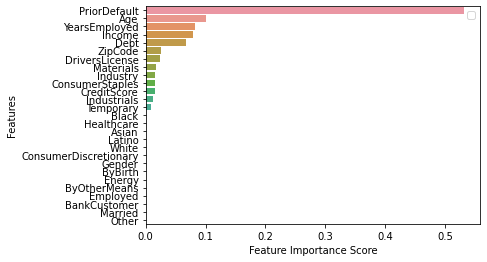

In [5397]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# plt.title("Visualizing Important Features")
plt.legend()
plt.show()